# Simple Visualizations of Data

Just like in our first notebook, we have to load yt and then some data.

In [1]:
import yt
import analysis_schema

For this notebook, we'll load up a cosmology dataset.

In [2]:
ds = yt.load("enzo_tiny_cosmology/DD0046/DD0046")
print ("Redshift =", ds.current_redshift)

yt : [INFO     ] 2020-05-29 14:46:13,534 Parameters: current_time              = 230.66527489234
yt : [INFO     ] 2020-05-29 14:46:13,535 Parameters: domain_dimensions         = [32 32 32]
yt : [INFO     ] 2020-05-29 14:46:13,535 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-05-29 14:46:13,537 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-05-29 14:46:13,541 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-05-29 14:46:13,543 Parameters: current_redshift          = -2.7810863612032e-09
yt : [INFO     ] 2020-05-29 14:46:13,544 Parameters: omega_lambda              = 0.727
yt : [INFO     ] 2020-05-29 14:46:13,546 Parameters: omega_matter              = 0.273
yt : [INFO     ] 2020-05-29 14:46:13,551 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-05-29 14:46:13,556 Parameters: hubble_constant           = 0.702


Redshift = -2.7810863612032e-09


## <font color='red'> Attempting to schematize a dataset </font>

In [49]:
ds2 = analysis_schema.Dataset(domain_left_edge=analysis_schema.UnitfulCoordinate(unit="unitary",
                                                                         values=[0.0, 0.0, 0.0,]),
                            domain_right_edge=analysis_schema.UnitfulCoordinate(unit="unitary",
                                                                         values=[1.0, 1.0, 1.0,]),
                             domain_dimensions= [32, 32, 32],
                              current_time = analysis_schema.UnitfulValue(value = 230.66527489234),
                             geometry = 'text',
                             dataset_type= "enzo",
                             domain_contexts = ['CosmologyContext'])
                              

ValidationError: 3 validation errors
domain_contexts -> 0
  value is not a valid dict (type=type_error.dict)
domain_contexts -> 0
  value is not a valid dict (type=type_error.dict)
domain_contexts -> 0
  value is not a valid dict (type=type_error.dict)

In the terms that yt uses, a projection is a line integral through the domain.  This can either be unweighted (in which case a column density is returned) or weighted, in which case an average value is returned.  Projections are, like all other data objects in yt, full-fledged data objects that churn through data and present that to you.  However, we also provide a simple method of creating Projections and plotting them in a single step.  This is called a Plot Window, here specifically known as a `ProjectionPlot`.  One thing to note is that in yt, we project all the way through the entire domain at a single time.  This means that the first call to projecting can be somewhat time consuming, but panning, zooming and plotting are all quite fast.

yt is designed to make it easy to make nice plots and straightforward to modify those plots directly.  The cookbook in the documentation includes detailed examples of this.

Parsing Hierarchy : 100%|██████████| 211/211 [00:00<00:00, 6191.87it/s]
yt : [INFO     ] 2020-05-29 14:46:18,727 Gathering a field list (this may take a moment.)
yt : [INFO     ] 2020-05-29 14:46:20,125 Projection completed
yt : [INFO     ] 2020-05-29 14:46:20,135 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-05-29 14:46:20,136 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-05-29 14:46:20,138 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-05-29 14:46:20,140 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-05-29 14:46:20,162 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



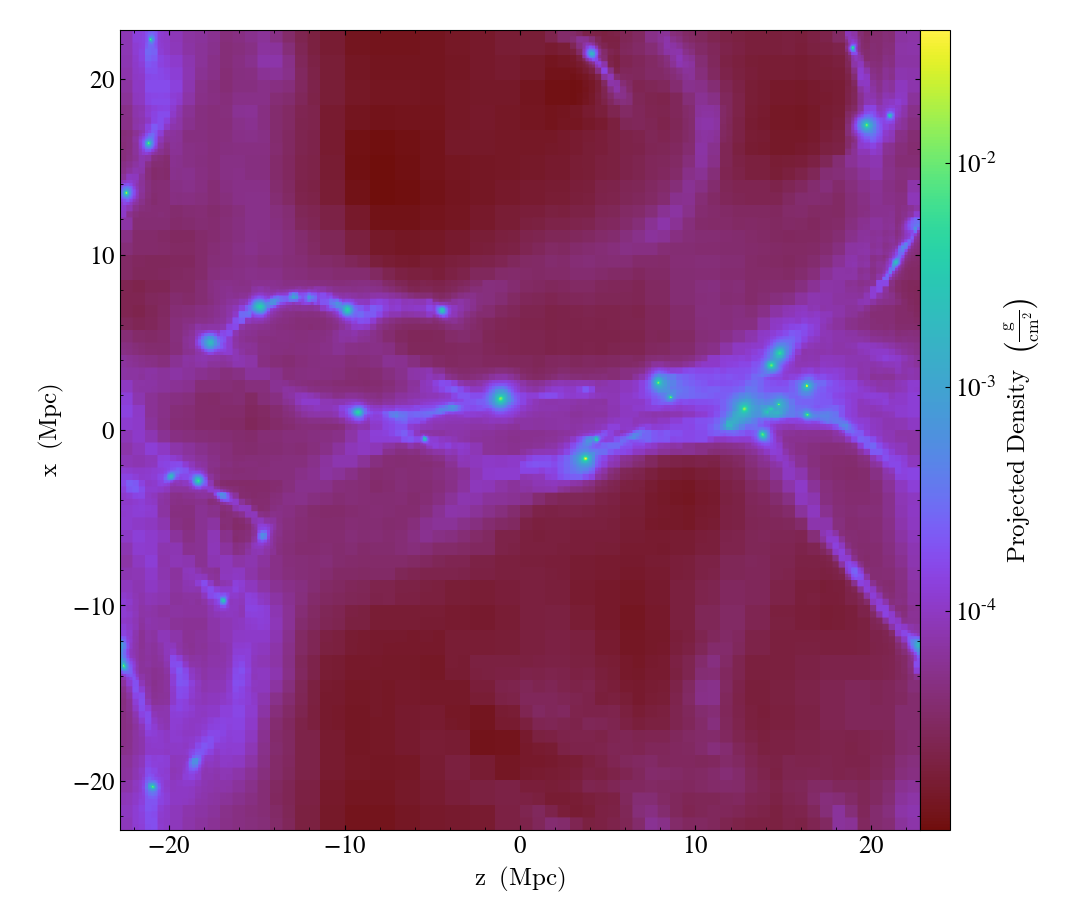

In [3]:
p = yt.ProjectionPlot(ds, "y", "density")
p.show()

## <font color='red'> Putting Project plot into a schema projection</font>
- I realize this isn't the same as a projection plot, but it seemed like it was worth a shot

In [31]:
p_schema = analysis_schema.Projection(source={ds.basename:ds})

In [36]:
p_schema

<Projection source=<AllDataID all_data=None> operation={'sum': 'density', 'axis': 'x'}>

In [41]:
p2_schema = analysis_schema.Projection(source={ds.basename:ds}, opertaion={'average':'density', 'axis': 'z'})

In [42]:
# trying to change the axis and the operation but it isn't working

p2_schema

<Projection source=<AllDataID all_data=None> operation={'sum': 'density', 'axis': 'x'}>

In [33]:
p_schema.json()

'{"source": {"all_data": null}, "operation": {"sum": "density", "axis": "x"}}'

In [34]:
p_schema.schema_json()

'{"title": "Projection", "type": "object", "properties": {"source": {"title": "Source", "default": {"all_data": {}}, "anyOf": [{"allOf": [{"$ref": "#/definitions/AllDataID"}]}, {"allOf": [{"$ref": "#/definitions/RegionID"}]}, {"allOf": [{"$ref": "#/definitions/SphereID"}]}]}, "operation": {"title": "Operation", "default": {"sum": "density", "axis": "x"}, "allOf": [{"$ref": "#/definitions/Operation"}]}}, "definitions": {"AllData": {"title": "AllData", "type": "object", "properties": {}}, "AllDataID": {"title": "AllDataID", "type": "object", "properties": {"all_data": {"$ref": "#/definitions/AllData"}}}, "UnitfulCoordinate": null, "Region": {"title": "Region", "type": "object", "properties": {"left_edge": {"$ref": "#/definitions/UnitfulCoordinate"}, "right_edge": {"$ref": "#/definitions/UnitfulCoordinate"}}, "required": ["left_edge", "right_edge"]}, "RegionID": {"title": "RegionID", "type": "object", "properties": {"region": {"$ref": "#/definitions/Region"}}, "required": ["region"]}, "Un

The `show` command simply sends the plot to the IPython notebook.  You can also call `p.save()` which will save the plot to the file system.  This function accepts an argument, which will be prepended to the filename and can be used to name it based on the width or to supply a location.

Now we'll zoom and pan a bit.

yt : [INFO     ] 2020-05-29 14:46:21,323 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



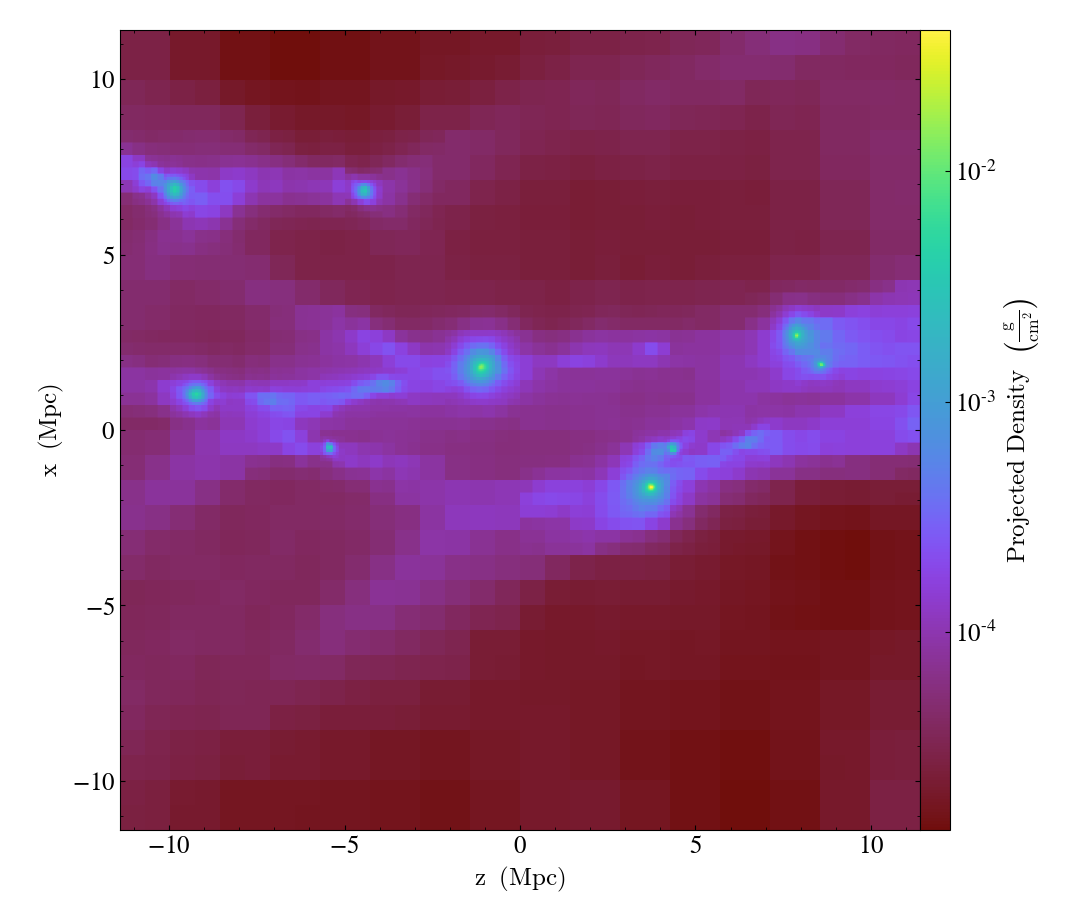

In [4]:
p.zoom(2.0)

yt : [INFO     ] 2020-05-29 14:46:21,732 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



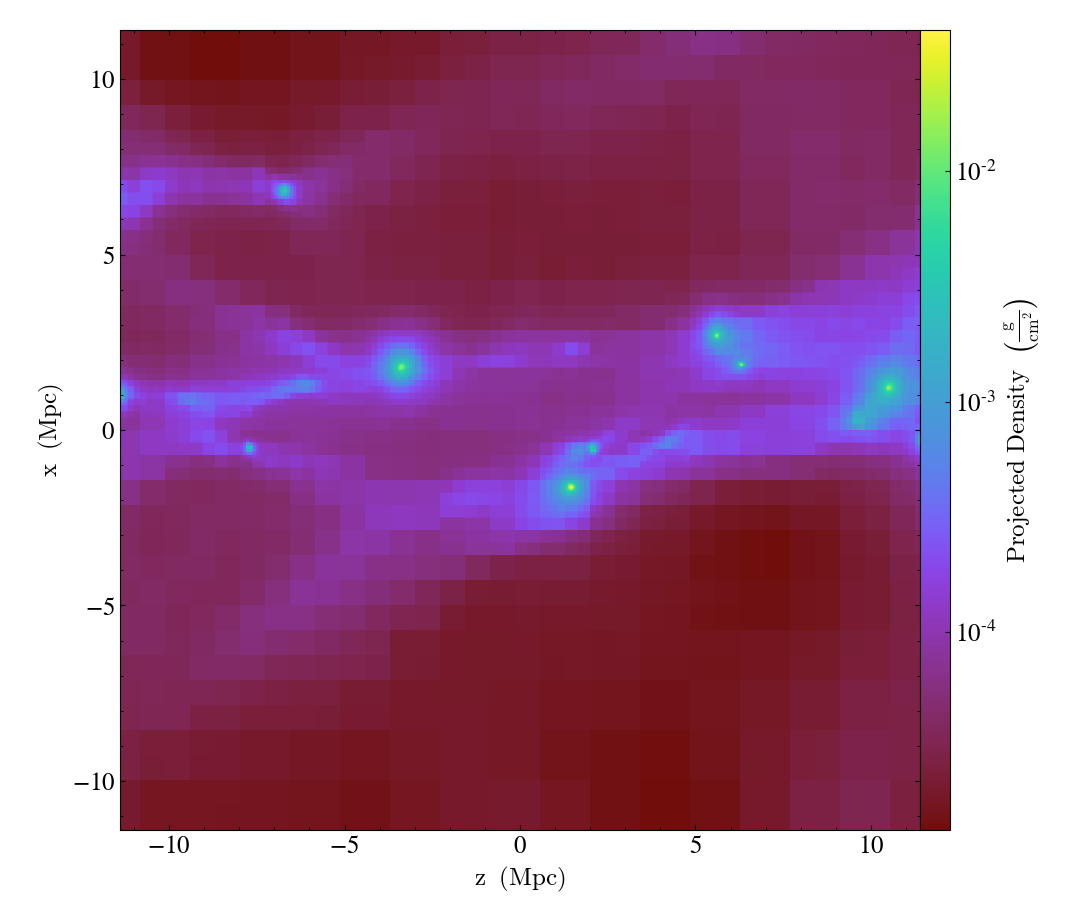

In [5]:
p.pan_rel((0.1, 0.0))

yt : [INFO     ] 2020-05-29 14:46:22,147 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



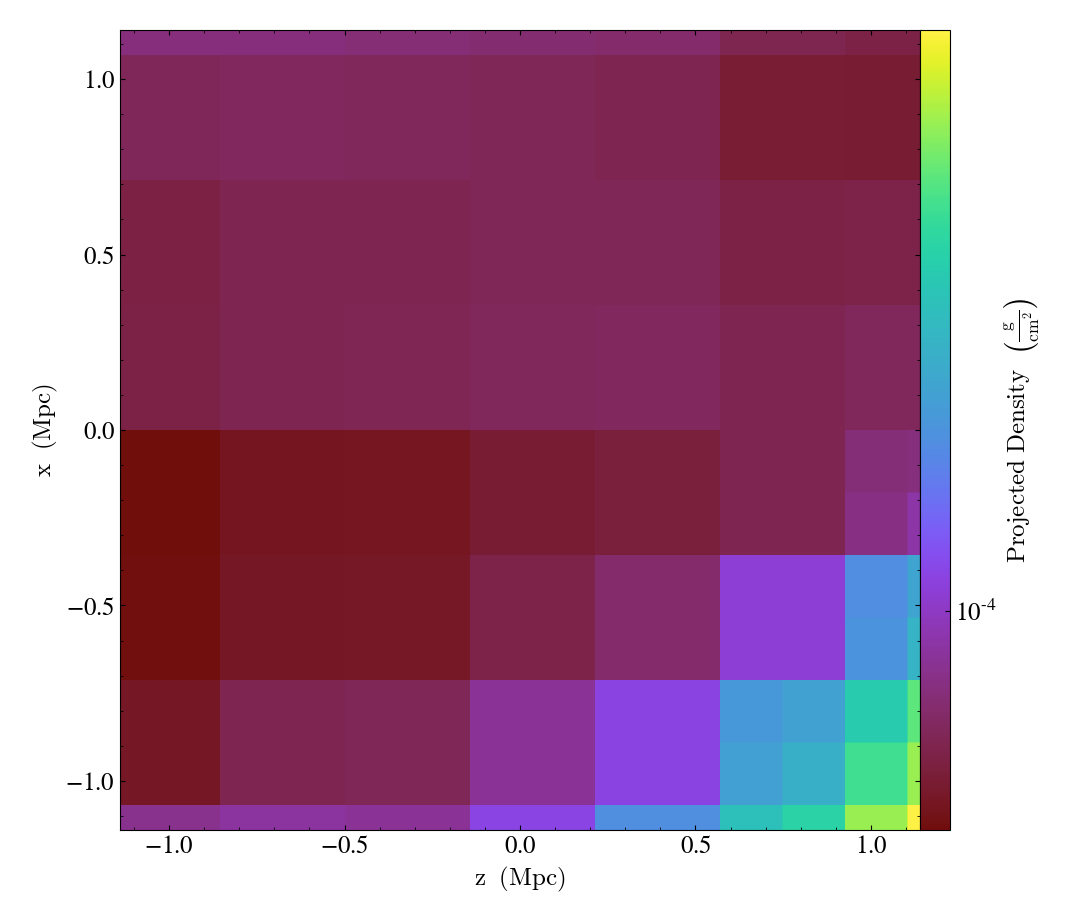

In [6]:
p.zoom(10.0)

yt : [INFO     ] 2020-05-29 14:46:22,518 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



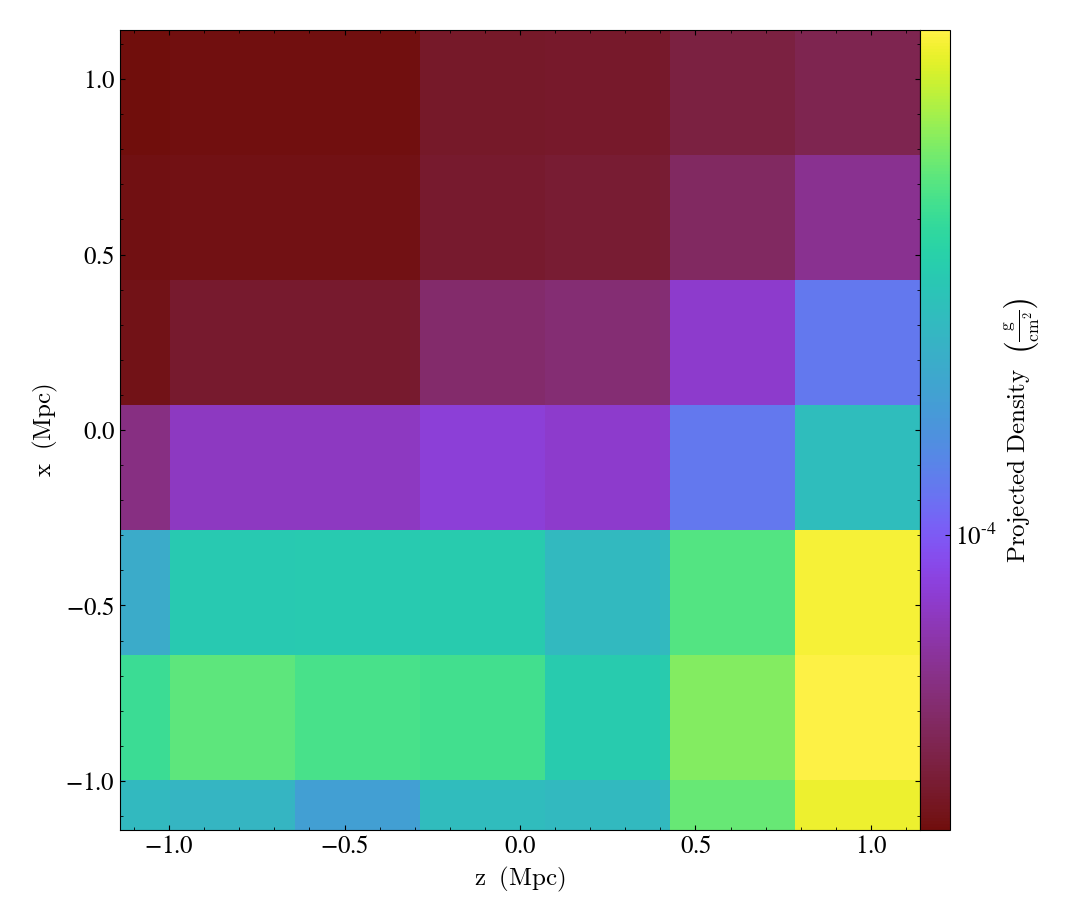

In [7]:
p.pan_rel((-0.25, -0.5))

yt : [INFO     ] 2020-05-29 14:46:22,891 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



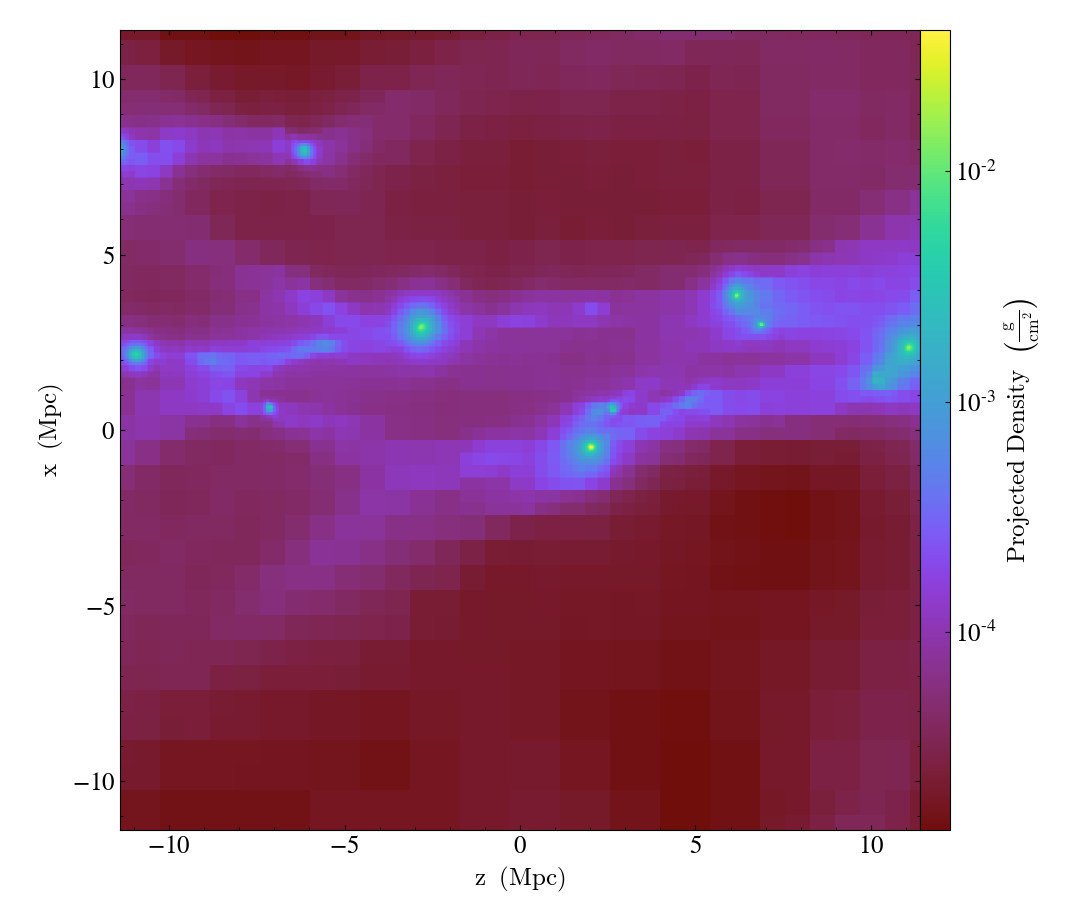

In [8]:
p.zoom(0.1)

If we specify multiple fields, each time we call `show` we get multiple plots back.  Same for `save`!

yt : [INFO     ] 2020-05-29 14:46:23,518 Projection completed
yt : [INFO     ] 2020-05-29 14:46:23,520 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-05-29 14:46:23,520 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-05-29 14:46:23,522 xlim = 0.000000 1.000000
yt : [INFO     ] 2020-05-29 14:46:23,525 ylim = 0.000000 1.000000
yt : [INFO     ] 2020-05-29 14:46:23,529 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2020-05-29 14:46:23,536 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



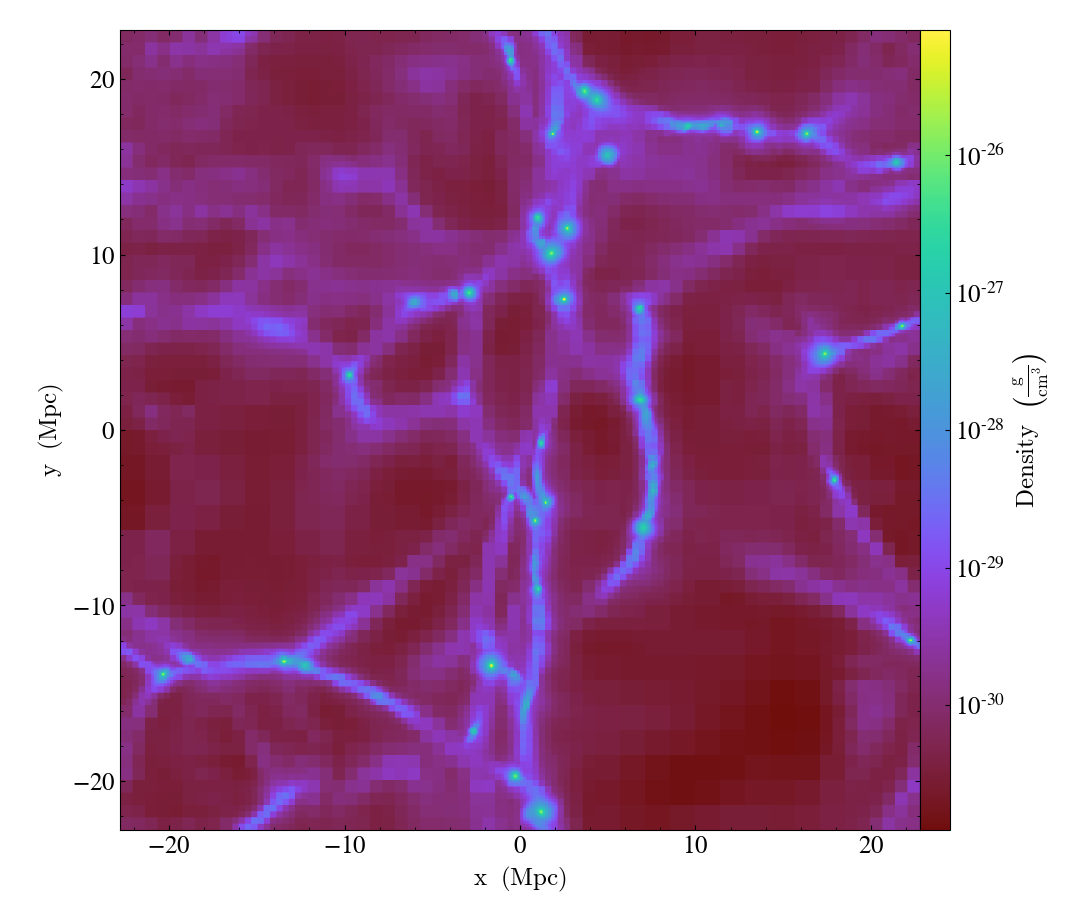
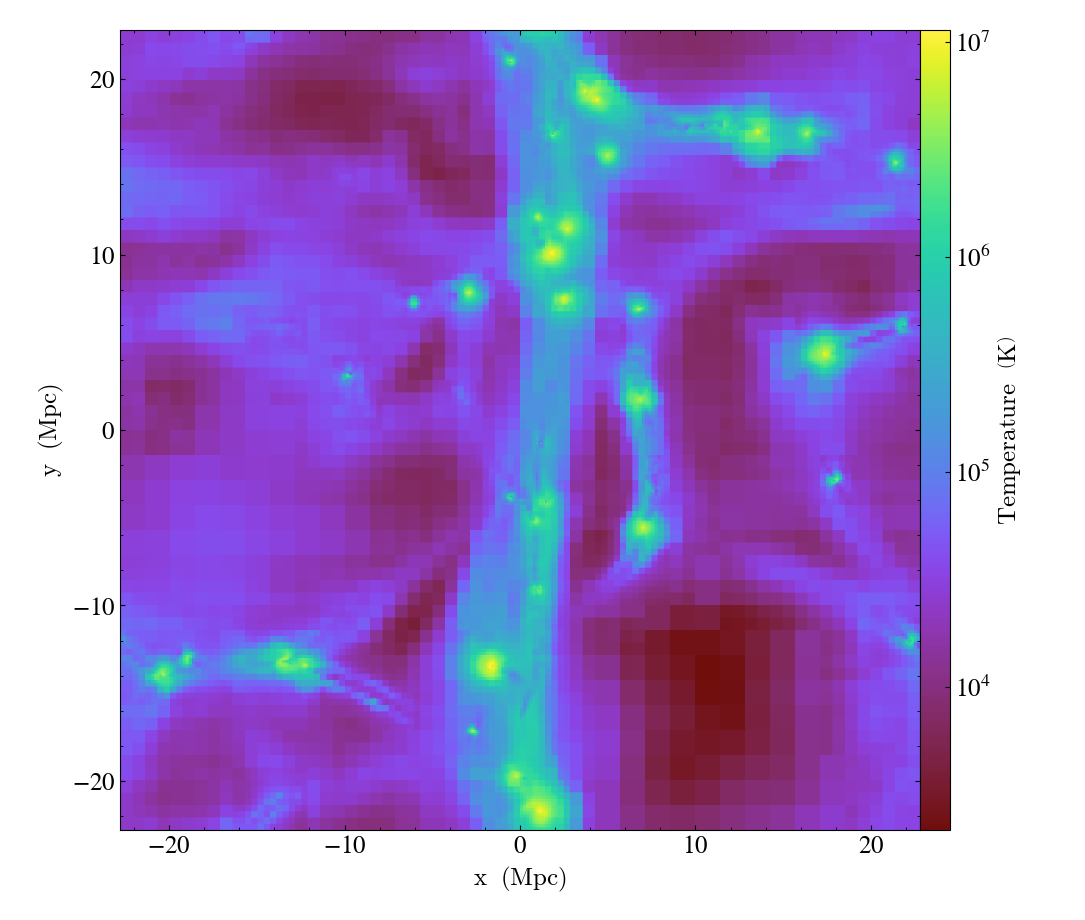

In [9]:
p = yt.ProjectionPlot(ds, "z", ["density", "temperature"], weight_field="density")
p.show()

We can adjust the colormap on a field-by-field basis.


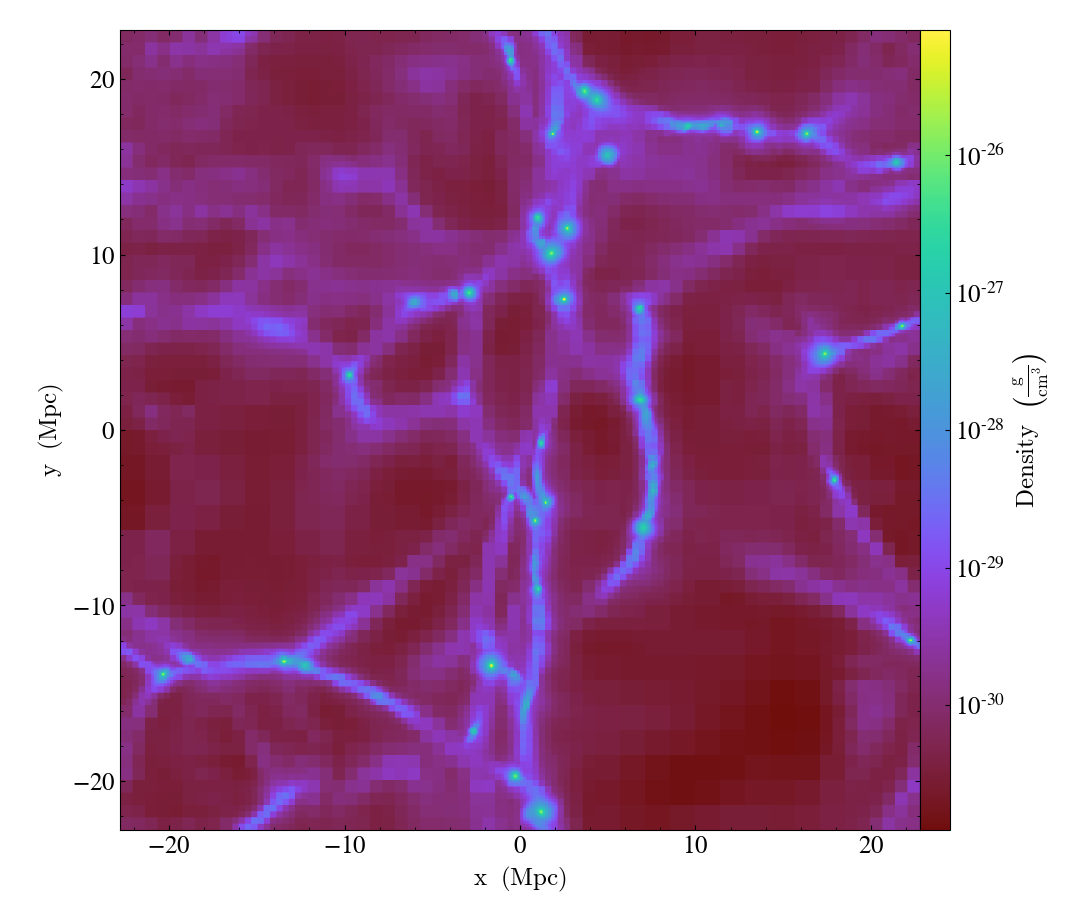
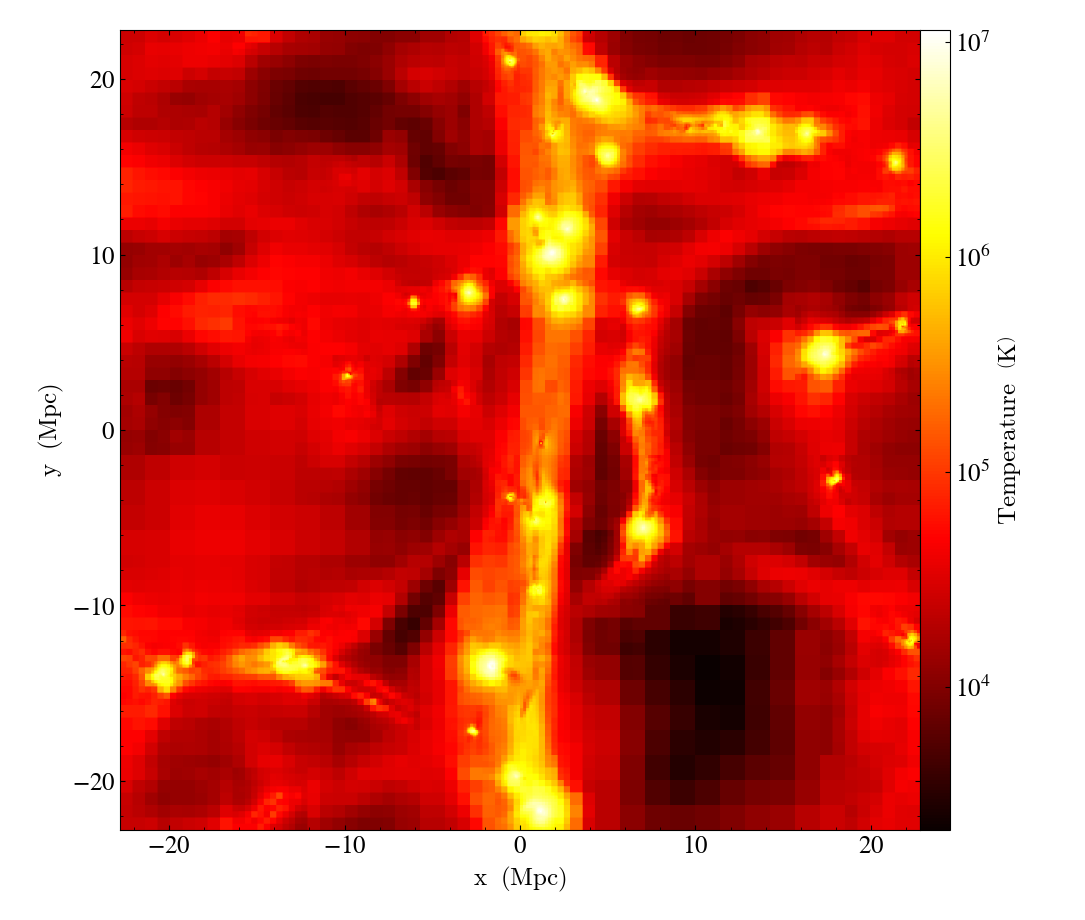

In [10]:
p.set_cmap("temperature", "hot")

And, we can re-center the plot on different locations.  One possible use of this would be to make a single `ProjectionPlot` which you move around to look at different regions in your simulation, saving at each one.

## <font color='red'> Attempting to schematize an opertaion </font>

yt : [INFO     ] 2020-05-29 14:46:25,633 Max Value is 2.56902e-25 at 0.5551757812500000 0.6635742187500000 0.8588867187499999
yt : [INFO     ] 2020-05-29 14:46:25,634 xlim = 0.055176 1.055176
yt : [INFO     ] 2020-05-29 14:46:25,635 ylim = 0.163574 1.163574
yt : [INFO     ] 2020-05-29 14:46:25,638 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2020-05-29 14:46:25,646 Making a fixed resolution buffer of (('gas', 'temperature')) 800 by 800



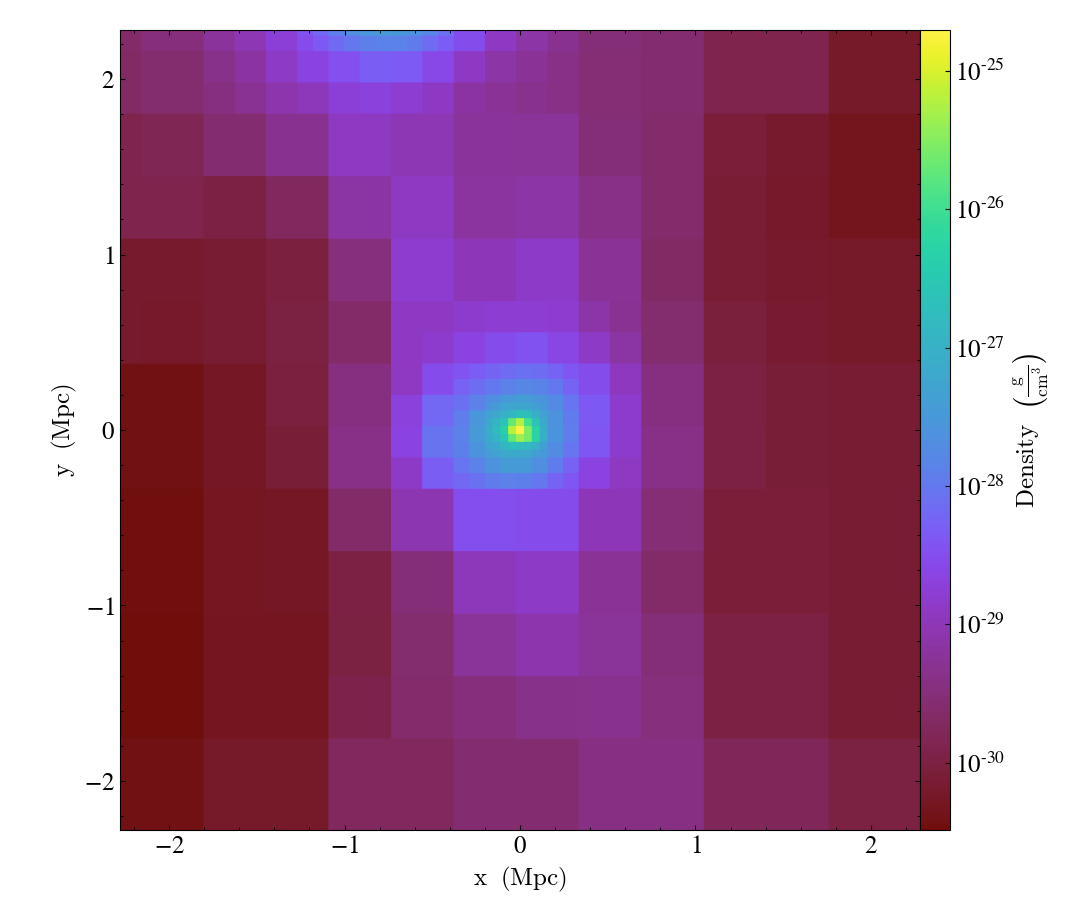
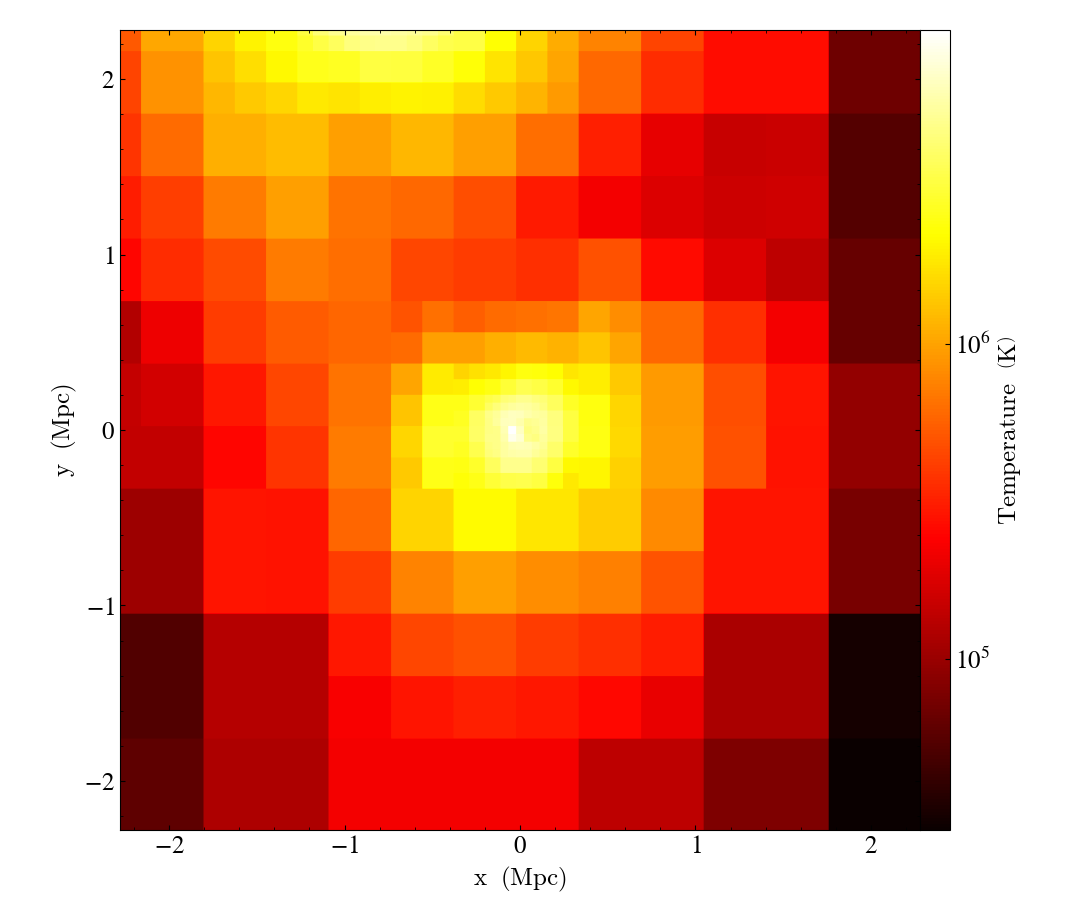

In [11]:
v, c = ds.find_max("density")
p.set_center((c[0], c[1]))
p.zoom(10)

In [29]:
# I need to enter a tuple of strings for the field data for some reason

schema_max = analysis_schema.Maximum(maximum= str(v), field= ("density", "temperature"), axis='x')

In [27]:
schema_max

<Maximum maximum='2.569016867361825e-25 g/cm**3' field=('density', 'temperature') axis='x'>

In [28]:
schema_max.json()

'{"maximum": "2.569016867361825e-25 g/cm**3", "field": ["density", "temperature"], "axis": "x"}'

Okay, let's load up a bigger simulation (from `Enzo_64` this time) and make a slice plot.

yt : [INFO     ] 2020-05-29 14:46:26,443 Parameters: current_time              = 645.81707236914
yt : [INFO     ] 2020-05-29 14:46:26,444 Parameters: domain_dimensions         = [64 64 64]
yt : [INFO     ] 2020-05-29 14:46:26,445 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2020-05-29 14:46:26,447 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2020-05-29 14:46:26,452 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2020-05-29 14:46:26,454 Parameters: current_redshift          = 0.0013930880640796
yt : [INFO     ] 2020-05-29 14:46:26,455 Parameters: omega_lambda              = 0.7
yt : [INFO     ] 2020-05-29 14:46:26,460 Parameters: omega_matter              = 0.3
yt : [INFO     ] 2020-05-29 14:46:26,462 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2020-05-29 14:46:26,464 Parameters: hubble_constant           = 0.71
Parsing Hierarchy : 100%|██████████| 752/752 [00:00<00:00, 4637.25it/s]
yt : [INFO     ] 2020-05-29 14:


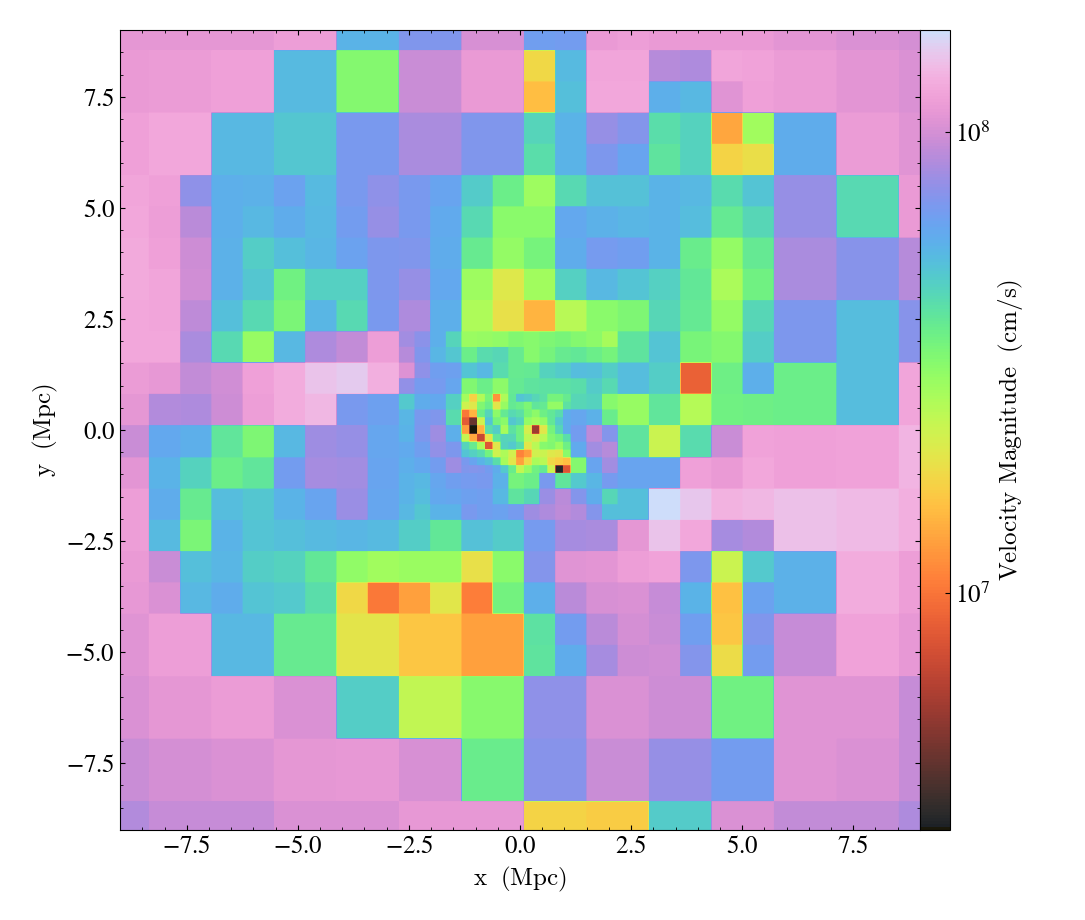
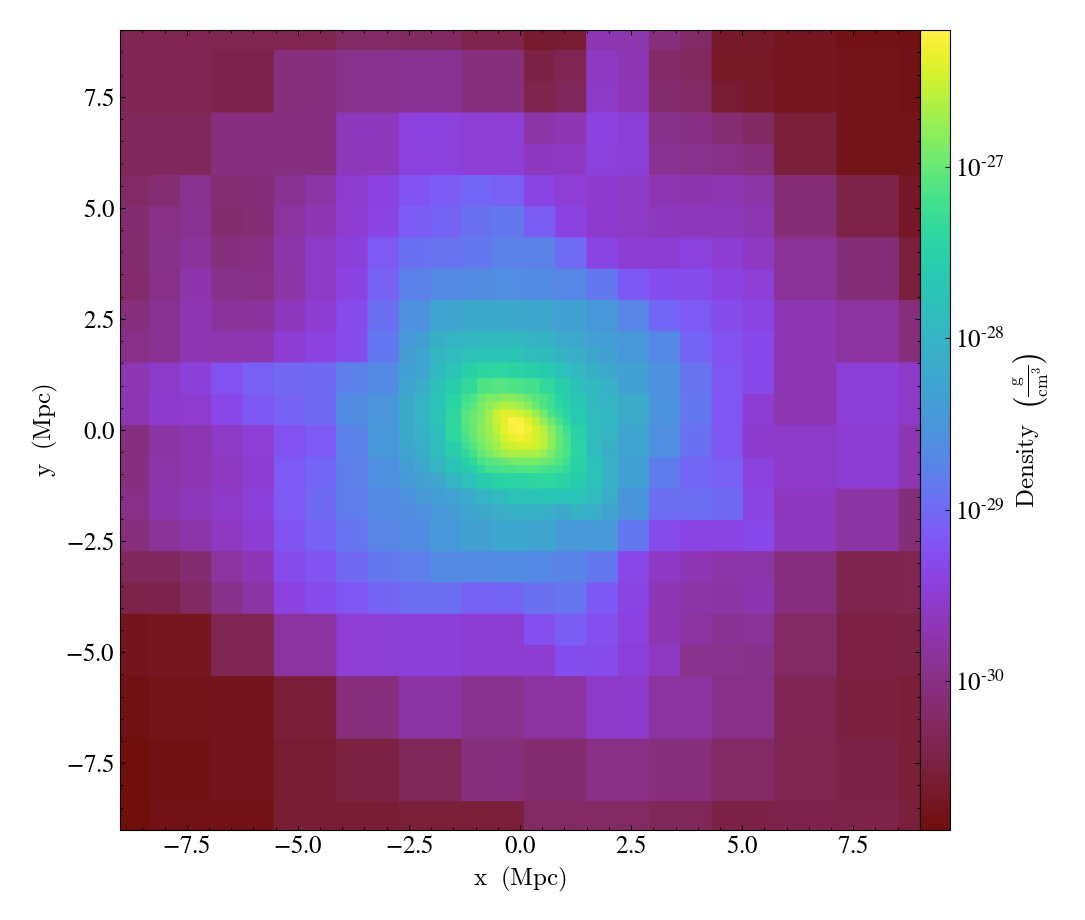

In [12]:
ds = yt.load("Enzo_64/DD0043/data0043")
s = yt.SlicePlot(ds, "z", ["density", "velocity_magnitude"], center="max")
s.set_cmap("velocity_magnitude", "kamae")
s.zoom(10.0)

We can adjust the logging of various fields:


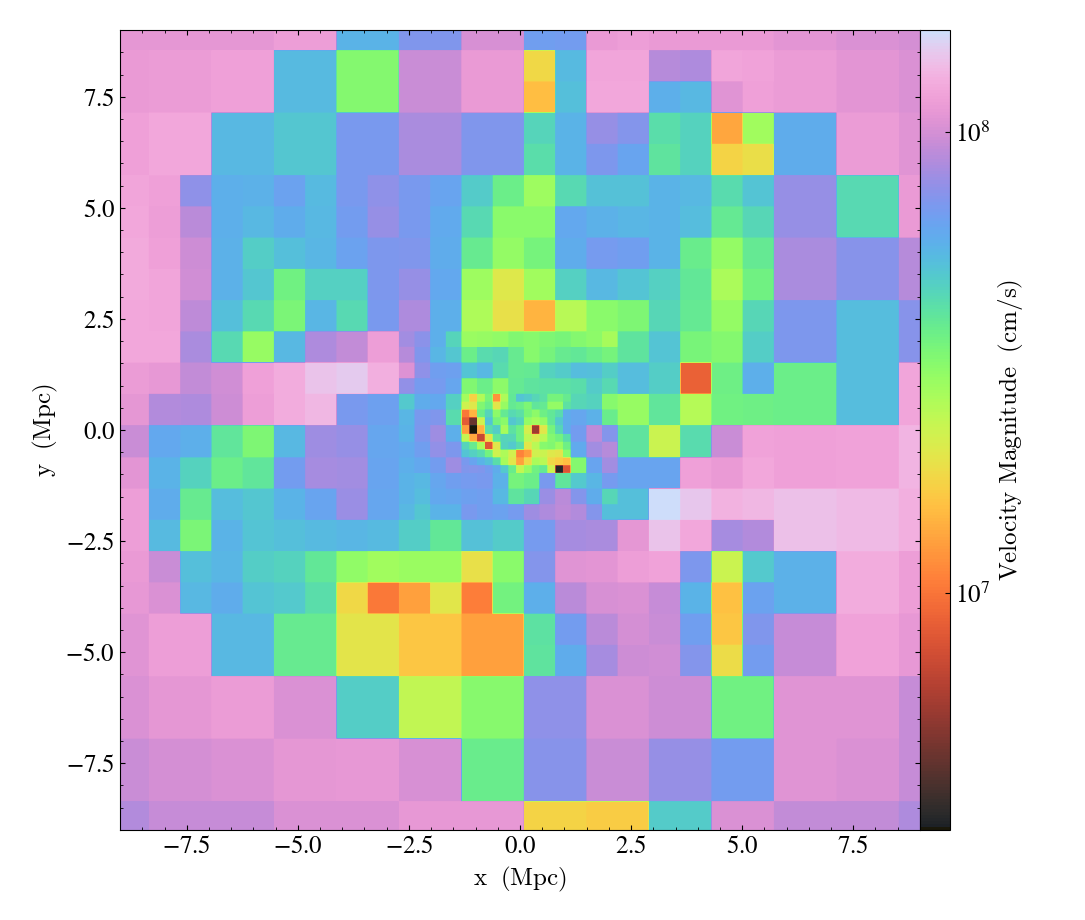
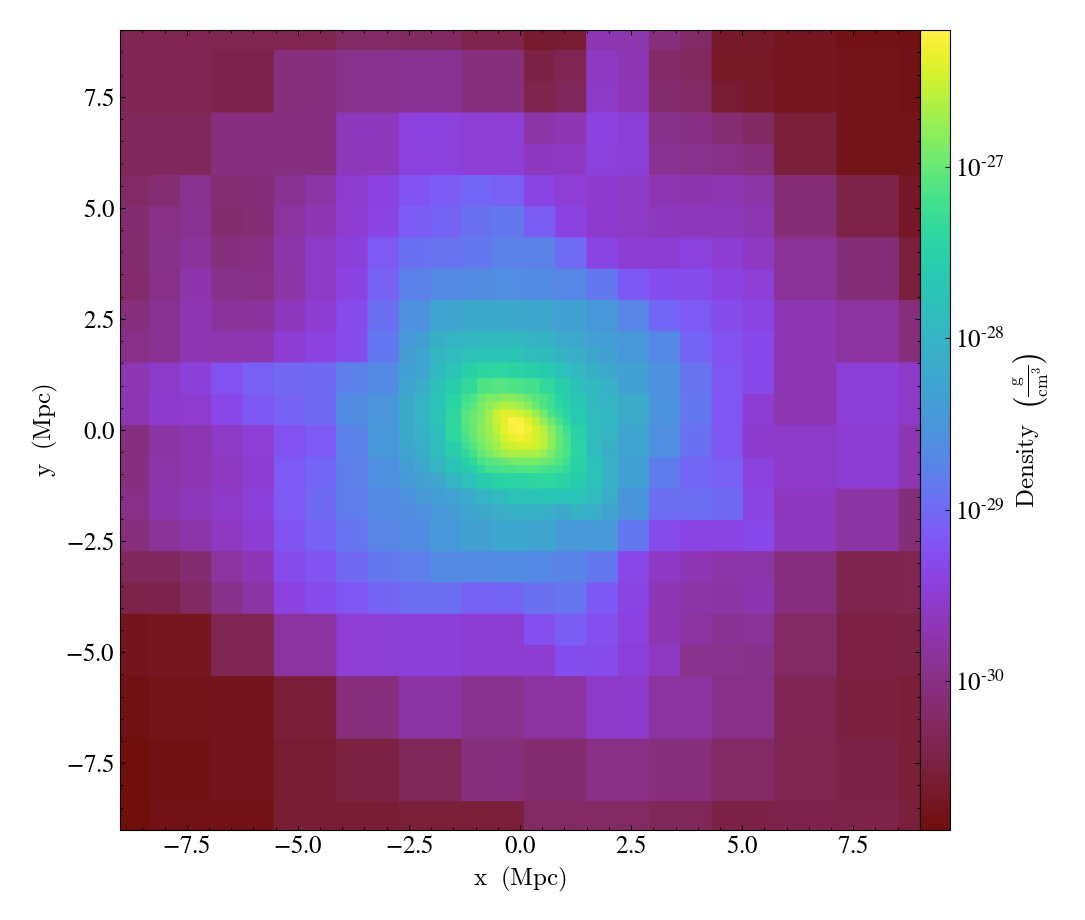

In [13]:
s.set_log("velocity_magnitude", True)

yt provides many different annotations for your plots.  You can see all of these in the documentation, or if you type `s.annotate_` and press tab, a list will show up here.  We'll annotate with velocity arrows.


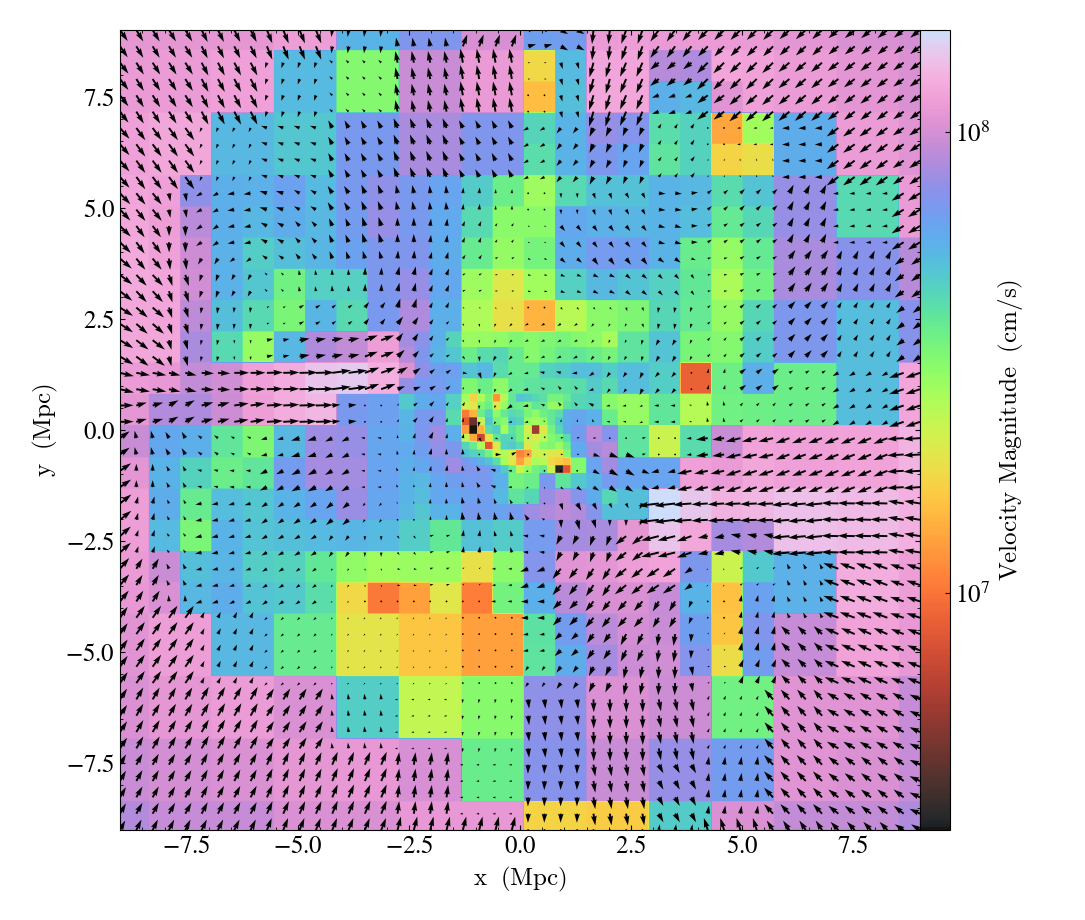
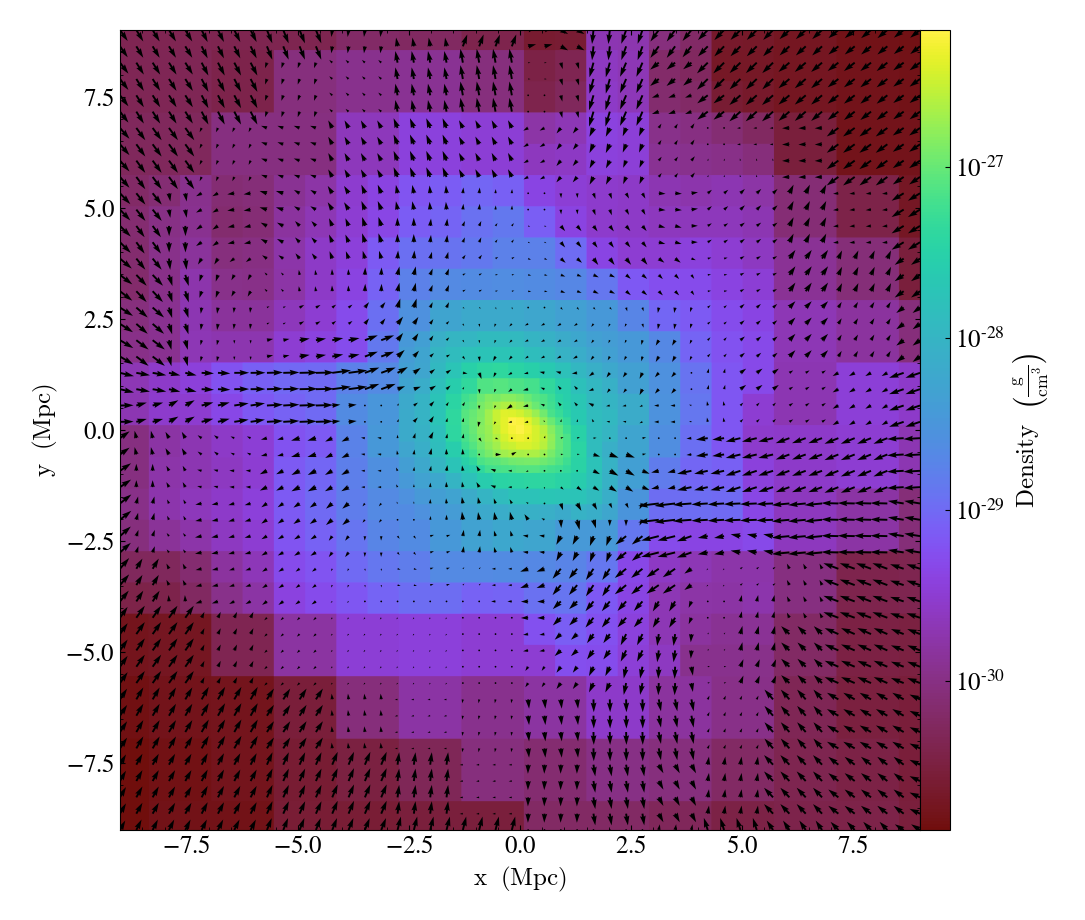

In [14]:
s.annotate_velocity()

Contours can also be overlaid:

yt : [INFO     ] 2020-05-29 14:46:32,277 Max Value is 6.27782e-27 at 0.2026367187500000 0.5463867187500000 0.1127929687500000
yt : [INFO     ] 2020-05-29 14:46:32,307 xlim = 0.046387 1.046387
yt : [INFO     ] 2020-05-29 14:46:32,308 ylim = -0.387207 0.612793
yt : [INFO     ] 2020-05-29 14:46:32,311 xlim = 0.046387 1.046387
yt : [INFO     ] 2020-05-29 14:46:32,312 ylim = -0.387207 0.612793
yt : [INFO     ] 2020-05-29 14:46:32,314 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2020-05-29 14:46:32,456 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



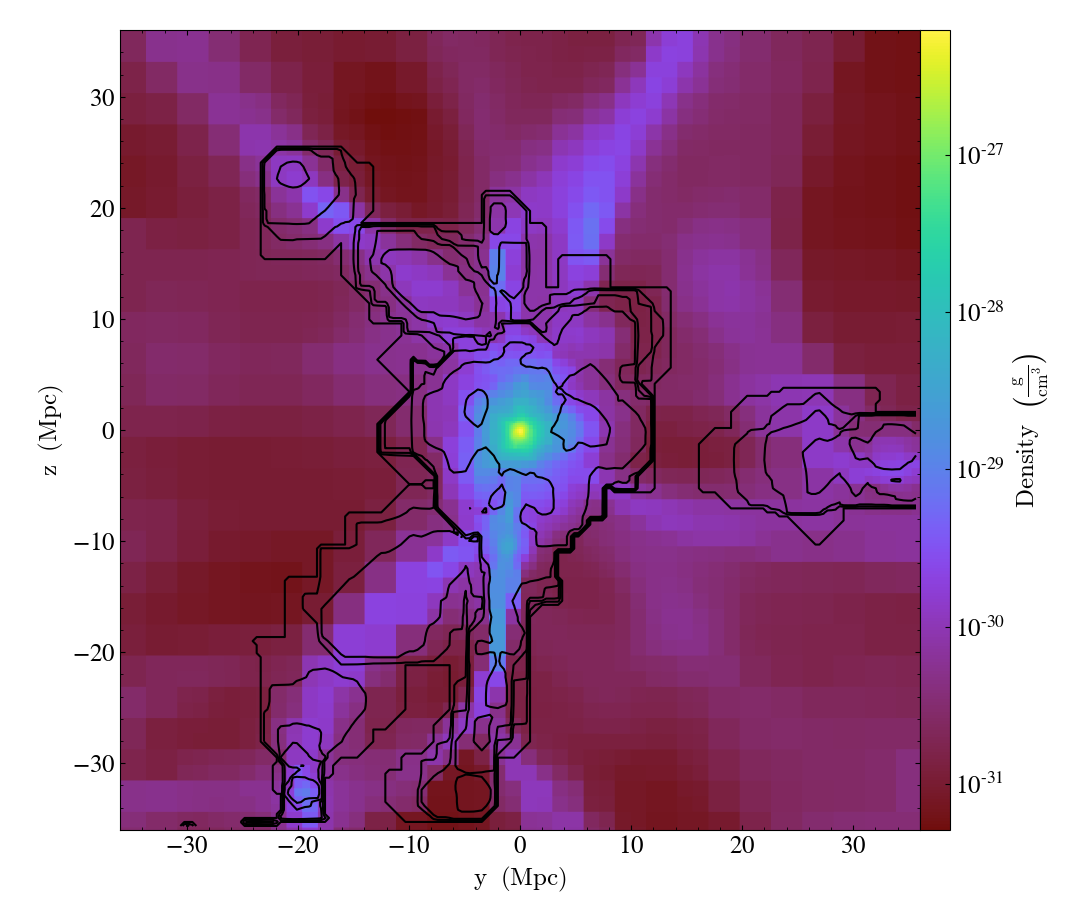

In [15]:
s = yt.SlicePlot(ds, "x", ["density"], center="max")
s.annotate_contour("temperature")
s.zoom(2.5)

Finally, we can save out to the file system.

In [16]:
s.save()

yt : [INFO     ] 2020-05-29 14:46:33,116 Saving plot data0043_Slice_x_density.png


['data0043_Slice_x_density.png']